In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

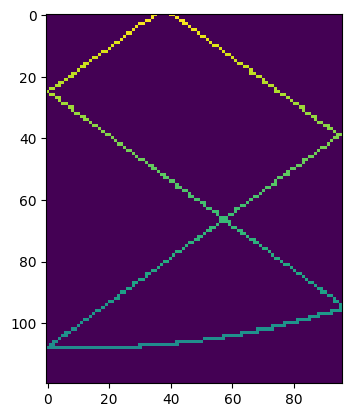

In [608]:
def draw_parabola(canvas, origin=None):
    if origin is None:
        origin_x = np.random.randint(0, canvas.shape[1])
        origin_y = np.random.randint(canvas.shape[0]*0.25, canvas.shape[0])
    else:
        origin_x = origin[0]
        origin_y = origin[1]
    
    theta = np.arange(0, 1*np.pi, 0.0001)
    
    min_side = np.minimum(canvas.shape[1], canvas.shape[0])
    radius = np.random.randint(min_side, min_side*3)
    x = origin_x + radius * np.cos(theta)
    y = (origin_y - radius + 1) + radius * np.sin(theta)
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    
    valid_indices = np.where((x >= 0) & (x < canvas.shape[1]) & (y >= 0) & (y < canvas.shape[0]))
    
    x_parabola_coords = x[valid_indices]
    y_parabola_coords = y[valid_indices]
    canvas[y_parabola_coords, x_parabola_coords] = 1
    
    point_r = (x_parabola_coords[0], y_parabola_coords[0])
    point_l = (x_parabola_coords[-1], y_parabola_coords[-1])
    
    return point_r, point_l


def draw_line(canvas, start, angle, max_lit_px=400):
    angle = np.radians(angle)
    
    dx = np.cos(angle)
    dy = np.sin(angle)

    x, y = start
    lit_pixels = 0
    
    while lit_pixels < max_lit_px:
        x_rounded = int(round(x))
        y_rounded = int(round(y))
        
        if 0 <= x_rounded < canvas.shape[1] and 0 <= y_rounded < canvas.shape[0]:
            canvas[y_rounded, x_rounded] = 1
        
        if lit_pixels != 0:
            if x_rounded <= 0:
                dx = abs(dx)
            elif x_rounded >= canvas.shape[1] - 1:
                dx = -abs(dx)
        
        x += dx
        y -= dy
        lit_pixels += 1
        

def add_time_value(canvas, t_start):
    rows, cols = canvas.shape

    first_row = None
    
    for row in range(rows-1, -1, -1):
        non_zero_indices = np.where(canvas[row, :] != 0)[0]
        if non_zero_indices.size > 0:
            if first_row is None:
                first_row = row
            time_index = first_row - row + t_start

            canvas[row, non_zero_indices] = time_index
    
    return canvas

data = torch.zeros(120, 96)
pr, pl = draw_parabola(data)

angle = np.random.randint(10, 40)
draw_line(data, pr, angle)
draw_line(data, pl, angle)
add_time_value(data, 100)

plt.imshow(data)

In [643]:
def add_time_dim(canvas, time_index):
    timed_data = torch.zeros(time_index, canvas.shape[0], canvas.shape[1])
    nonzero_x = canvas.nonzero()[:, 1]
    nonzero_y = canvas.nonzero()[:, 0]
    time_values = canvas[nonzero_y, nonzero_x].to(torch.int)
    timed_data[time_values, nonzero_y, nonzero_x] = 1
    return timed_data
    
timed_data = add_time_dim(data, 1000)

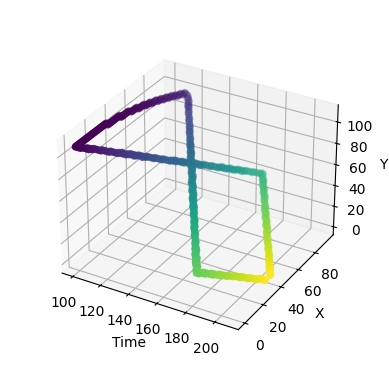

In [644]:
ax = plt.figure().add_subplot(projection='3d')
timed_data_nonezero = timed_data.nonzero()
ax.scatter(timed_data_nonezero[:, 0], timed_data_nonezero[:, 2], timed_data_nonezero[:, 1], c=timed_data_nonezero[:, 0])
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_box_aspect(None, zoom=0.85)

In [690]:
def generate_binary_noise(*dim, p=0.5, magnitude=1):
    random_tensor = torch.rand(*dim)
    return (random_tensor < p).float() * magnitude

In [707]:
noised_data = torch.clamp(generate_binary_noise(1000, 120, 96, p=0.00002) + timed_data, 0, 1)

(1000, 120, 96)


In [708]:
len(noised_data.nonzero())

660

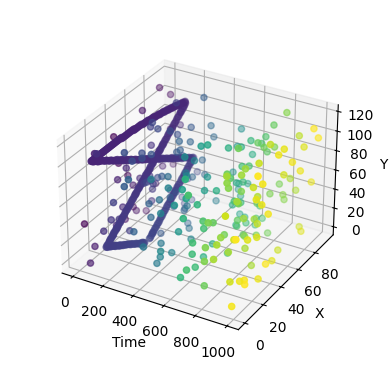

In [709]:
ax = plt.figure().add_subplot(projection='3d')
noised_data_nonezero = noised_data.nonzero()
ax.scatter(noised_data_nonezero[:, 0], noised_data_nonezero[:, 2], noised_data_nonezero[:, 1], c=noised_data_nonezero[:, 0])
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_box_aspect(None, zoom=0.85)